# 😵 **Random walk** hypothesis
*Random walk is a **special** case of ARIMA*

### What is it?
- It is about *those* stocks which follow a **random walk** ie. its price is not predictable.
- "*Sometimes the best-fitting model is in fact a random walk*"
- It is either to go up or down randomly having 50-50 chance on each direction
- It is ***impossible*** predict the next as there is 50-50 chances

### ***Gaussian*** random walk?
- It is where the up and down values come from the Gaussian distribution
- Meaning, what we have just done in the previous notebook - *(Adding the np.randn() as the noise)*
- So, here the prices don't go 1 unit up or down but go ***any*** value from the **gaussian distribution**, thus called: Gaussian Random Walk
- $new = old + e$

Since there is unpredictability, we can only know that the error $e \in N(0, \sigma^2)$

# 

### Something interesting that we can do *with* log

The general formulae for new price *(in random walk)*:
# $$new = old + \mu + e$$

$\mu = $ Drift - This would control the trend of the time series. <br>
$e = $ The noise $\in N(0, \sigma^2)$
<br>—<br>
That's what we had essentially did in the python code:
```python
new_price = log_price + mu + returns
```
Thus, it means that this is the general formulae to calculate the new price in the random walk hypothesis.

##### 

#### A bit of simulation about the **drift** term

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def get_prices(mu):
    T = 1000
    price = 10
    log_price = np.log(price)
    prices = np.zeros(T)
    log_return = np.zeros(T)
    state = np.random.RandomState(121)

    for t in range(T):    
        returns = 0.01 * state.randn()
        new_price = log_price + mu + returns
        log_return[t] = returns + mu
        prices[t] = np.exp(new_price)
        log_price = new_price
    return prices

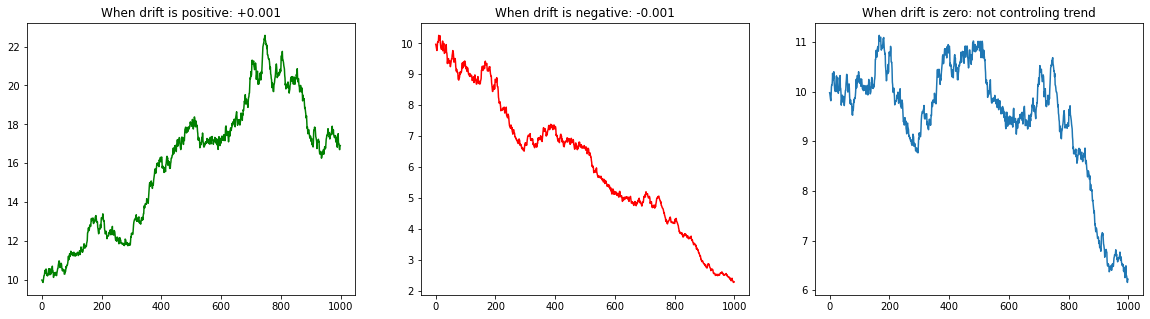

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].plot(get_prices(mu=0.001), 'g')
axes[0].set_title("When drift is positive: +0.001")
axes[1].plot(get_prices(mu=-0.001), 'r')
axes[1].set_title("When drift is negative: -0.001");
axes[2].plot(get_prices(mu=0))
axes[2].set_title("When drift is zero: not controling trend");

So, from the charts above - we can see that changing the drift term changes the overall trend of the time series.

##### 

### It becomes *log return* when...

# $$new = old + \mu + e$$
### $$↓$$
# $$\text{log return} = new - old =  \mu + e$$

> ### Recall, it is the situation **when I told you to forget as you read**... but that thing has come here to rescue! (Sorry 😅)

So just to revise what is that about: 

- We have two values `old` and `new`
- Calculated **GrossReturn** by `new/old`
- Gross Return is different from **Return**
- Gross return is always positive so that we can take log *(`0 < GR < 1: Loss` & `1 < GR: Profit`)*


Now, the difference between $log(new) - log(old) = log(GrossReturn)$ remember?
<br>—<br>
That's what is happening here: $\text{log return} = new - old =  \mu + e$

> Thus, taking **log** has simplified things! Otherwise we would have to take the `old` in the denominator ($GR = \frac{new}{old}$) to get the return... but with log, it is just the subtraction! ($GR = log(new) - log(old)$)

#### 

## 📑 Conclusion?
So what does theeessseee whole story tell us?
<br> It simply states that:

# <center> "The log return is just a **gaussian** with mean (drift) and $\sigma^2$" </center>
#### $$↓$$
# $$\text{log return} = N(\mu, \sigma^2)$$

And it also creates the **basis** of the "Black Scholes" formulae.

# 

## 🔮 Assumptions of Random Walk Hypothesis

1. log returns are **Independent & Identically Distributed**
2. Meaning there should not be an essence of **Volatility Clustering**
        "Large changes tend to be followed by large changes, of either sign, and small changes tend to be followed by small changes."
3. That is, the returns are **"uncorrelated"** so the return today does not depend on the return of yesterday
4. If the volatility of one period has some relationship with other volatility in the near by period - then it also is not independent

###### 

### Sou,
1️⃣ It is used in Black-scholes *(don't know what it is at this point of time)*<br>
2️⃣ Sometimes best fitting model in ARIMA<br>
3️⃣ Possible to use **statistical tests** to determine whether or not a time series is a random walk or not.

# 

# We will be back
In the next notebook. Now I will have to end this book here because I want to discuss another topic called "**Markov Chain**" which will base our analysis of the Random Walk time series. Including that here will make this book too long.

See you there 🙋‍♂️